In [1]:
import cv2
import numpy as np
image = cv2.imread('i1.jpeg')

kernel = np.ones((30, 30), np.uint8)


closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

rt, thresholded_image = cv2.threshold(closed_image, 30, 255, cv2.THRESH_BINARY)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rt2, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

black_mask_thresholded = cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2GRAY)
rt3, black_mask_thresholded = cv2.threshold(
    black_mask_thresholded, 20, 255, cv2.THRESH_BINARY)


mask = np.logical_and(image == 0, black_mask_thresholded == 0)
# print(mask)
image[mask] = 255

cv2.imwrite("output.png", image)
cv2.imshow("Image: ", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
from scipy import ndimage
img = cv2.imread("output.png")
img_copy = 255-img
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# Finding contours for the thresholded image
opening1 = cv2.morphologyEx(img_copy, cv2.MORPH_OPEN, kernel, iterations=1)
opening2 = cv2.morphologyEx(img_copy, cv2.MORPH_OPEN, kernel, iterations=5)

# opening2=255-opening2
opening1 = 255-opening1

labeled, nr_objects = ndimage.label(opening2)
print("Number of head is - " + str(nr_objects))
cv2.imwrite("heads.png", opening2)
cv2.imshow("img", opening2)

cv2.waitKey(0)
cv2.destroyAllWindows()
# print(img)


Number of head is - 12


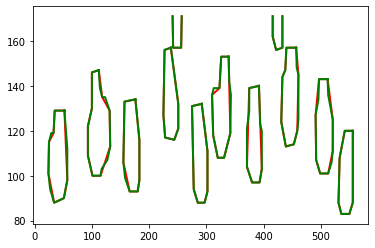

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon
# trying polygonalisation
img = cv2.imread("heads.png")
# convert the input image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,70,255,0)

for contour in find_contours(thresh, 0):
    coords = approximate_polygon(contour, tolerance=2.5)
    plt.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
    coords2 = approximate_polygon(contour, tolerance=1.5)
    plt.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
    


plt.show()